In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler

# Load the dataset and explore the variables.

In [2]:
data = pd.read_csv('customer_churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


# We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [6]:
data_ext = data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn']]

In [7]:
data_ext['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

# Extract the target variable.

In [8]:
# Before extracting the target variable, we'll convert the values 
# from 'Churn' column to binary ('yes' = 1 and 'no' = 0), so we'll able
# to execute AUC at the end of the file (question 10):

def clean_churn(x):
    if x == 'Yes':
        return 1
    else:
        return 0

In [9]:
data_ext['Churn'] = data_ext['Churn'].apply(clean_churn)

C:\Users\lluis\AppData\Local\Temp/ipykernel_19036/717388432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ext['Churn'] = data_ext['Churn'].apply(clean_churn)


In [10]:
data_ext['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [11]:
y = data_ext['Churn']

# Extract the independent variables and scale them.

In [12]:
X = data_ext.drop(['Churn'], axis = 1)

X_num = X.select_dtypes(include = np.number)
# X_cat = X.select_dtypes(exclude = np.number)  # there are none after extract target variable

In [13]:
X_num.head(1)

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85


In [14]:
y.head(1)

0    0
Name: Churn, dtype: int64

## Scaling NUMERICAL categories:

In [83]:
scaler = RobustScaler()
scaler.fit(X_num)
X_num_scaled = pd.DataFrame(scaler.transform(X_num), columns = X_num.columns)

In [87]:
X_num_scaled.shape

(7043, 3)

In [88]:
y.shape

(7043,)

In [89]:
X_num_scaled.head(1)

,SeniorCitizen,tenure,MonthlyCharges
0,0.0,-0.608696,-0.74517


# Build the logistic regression model.

## Train Test splitting:

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_num_scaled, y, test_size = 0.45, random_state = 40)

In [100]:
y_train.value_counts()

0    2843
1    1030
Name: Churn, dtype: int64

## Defining Model (Logistic Regression to Classify):

In [20]:
classification = LogisticRegression(max_iter = 500)

In [21]:
classification.fit(X_train, y_train)

LogisticRegression(max_iter=500)

# Evaluate the model.

In [22]:
y_test_pred = classification.predict(X_test)

In [23]:
round(accuracy_score(y_test, y_test_pred), 2)

0.79

# Even a simple model will give us more than 70% accuracy. Why?



In [24]:
data_ext['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [26]:
confusion_matrix(y_test, y_test_pred)

array([[2120,  211],
       [ 458,  381]], dtype=int64)

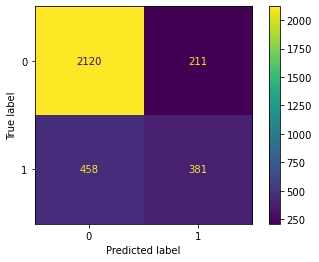

In [27]:
cmx = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cmx)
disp.plot();

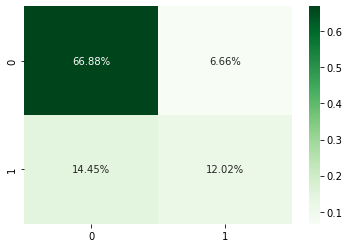

In [28]:
sns.heatmap(cmx / np.sum(cmx), annot = True, fmt = '.2%', cmap = 'Greens');

**Answer**:


As we can see, the **accuracy** we get is almost **79%**. This is because we have more than double of values of no churn than yes (there is **imbalance**); therefore, from our tested data, we get a high percentage (67% in the heatmap) which is not churn and we predicted correctly that are not churn. This is how many times we are correct, and in that case we are 79% correct.

# Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [45]:
from imblearn.over_sampling import SMOTE

In [93]:
smote = SMOTE(random_state = 12, sampling_strategy = 1.0)

X_train_ros, y_train_ros = smote.fit_resample(X_train, y_train)

classification.fit(X_train_ros,y_train_ros)

y_test_pred_ros = classification.predict(X_test)

In [99]:
y_train_ros.value_counts()

0    2843
1    2843
Name: Churn, dtype: int64

In [94]:
round(accuracy_score(y_test, y_test_pred_ros), 2)

0.73

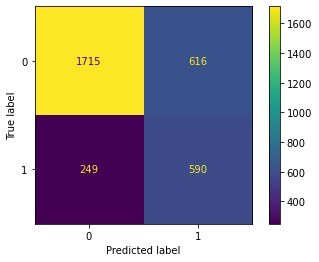

In [96]:
cm_ros = confusion_matrix(y_test, y_test_pred_ros)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_ros)
disp.plot();

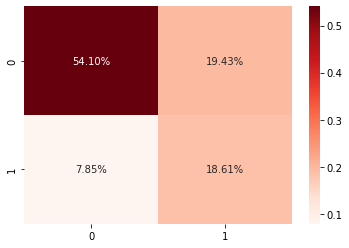

In [76]:
sns.heatmap(cm_ros / np.sum(cm_ros), annot = True, fmt = '.2%', cmap = 'Reds');

**No**, there is no improvement. Even if we apply the SMOTE method to get a more balanced dataframe, the accuracy is less than the simple logistic model (79%, but less balanced).

# Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [64]:
from imblearn.under_sampling import TomekLinks

In [90]:
tk_link = TomekLinks()

X_tk_link, y_tk_link = tk_link.fit_resample(X_num_scaled, y)

X_train_tk_link, X_test_tk_link, y_train_tk_link, y_test_tk_link = train_test_split(X_tk_link, y_tk_link,test_size = 0.45, random_state = 40)

classif_tk_link = TomekLinks()
classif_tk_link.fit(X_train_tk_link, y_train_tk_link)

y_test_pred_tk_link = classification.predict(X_test_tk_link)

round(accuracy_score(y_test_tk_link, y_test_pred_tk_link), 2)

0.75

In [101]:
y_train_tk_link.value_counts()

0    2588
1    1021
Name: Churn, dtype: int64

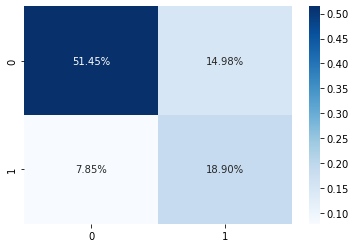

In [92]:
cmx_tk=confusion_matrix(y_test_tk_link,y_test_pred_tk_link)
sns.heatmap(cmx_tk/np.sum(cmx), annot=True, fmt='.2%', cmap='Blues');

**Neither** with the undersampling method. However, it is slightly better (75%) than the SMOTE method (73%).

# AUC (Area Under the ROC Curve) - 'data not worthed'

In [102]:
from sklearn.metrics import roc_auc_score, roc_curve

In [103]:
y_pred_probs = classification.predict_proba(X_test_ros)[::, 1]

In [104]:
y_pred_probs

array([4.97630212e-60, 1.00000000e+00, 1.00000000e+00, ...,
       1.00000000e+00, 1.00000000e+00, 9.99999775e-01])

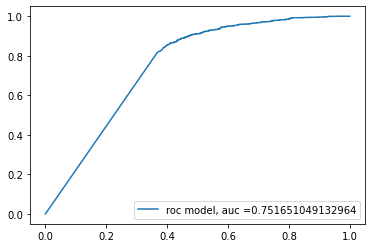

In [105]:
fpr, tpr, _ = roc_curve(y_test_ros, y_pred_probs)
auc = roc_auc_score(y_test_ros, y_pred_probs)
plt.plot(fpr, tpr, label = 'roc model, auc =' + str(auc))
plt.legend(loc = 4)
plt.show();

In [106]:
y_pred_raw_probs = classification.predict_proba(X_test)[::, 1]

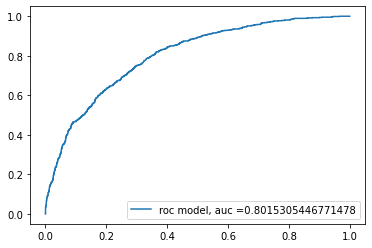

In [107]:
fpr, tpr, _ = roc_curve(y_test, y_pred_raw_probs)
auc = roc_auc_score(y_test, y_pred_raw_probs)
plt.plot(fpr, tpr, label = 'roc model, auc =' + str(auc))
plt.legend(loc = 4)
plt.show();

Comparing the curves, there is no improvement when we apply the imbalance models (first curve).